# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [417]:
data = pd.read_csv("../data/states_edu.csv")
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [418]:
data["AVG_MATH_8_SCORE"] = data["AVG_MATH_8_SCORE"].dropna()

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_MATH_8_SCORE*

How many years of data are logged in our dataset? 

In [419]:
data["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [420]:
state_avgs = data.groupby("STATE")[["AVG_MATH_8_SCORE"]].mean()
print(state_avgs.loc["MICHIGAN"])
print(state_avgs.loc["OHIO"])

AVG_MATH_8_SCORE    276.166667
Name: MICHIGAN, dtype: float64
AVG_MATH_8_SCORE    282.25
Name: OHIO, dtype: float64


Find the average for your outcome score across all states in 2019

In [421]:
state_avgs["AVG_MATH_8_SCORE"].mean()

278.5171248039172

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [422]:
max_score = data.groupby("STATE")[["AVG_MATH_8_SCORE"]].max()
max_score.loc["MICHIGAN"]

AVG_MATH_8_SCORE    280.0
Name: MICHIGAN, dtype: float64

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [423]:
data["FUNDING_EXPENDITURE_RATIO"] = (data["TOTAL_REVENUE"]) / data["TOTAL_EXPENDITURE"]
state_year_per_rev = data.dropna(subset=['STATE', 'YEAR', 'TOTAL_REVENUE'])

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

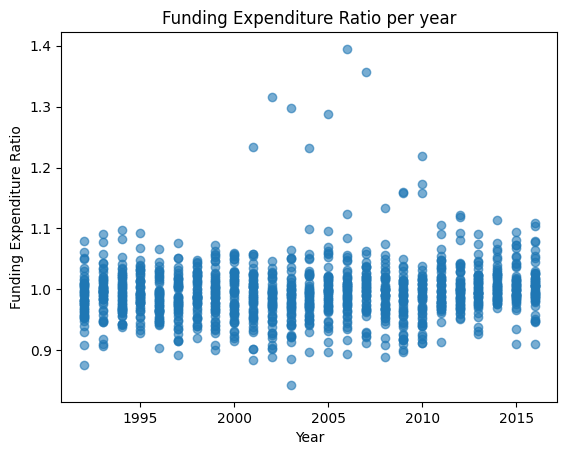

In [424]:
import matplotlib.pyplot as plt

plt.scatter(data["YEAR"], data["FUNDING_EXPENDITURE_RATIO"], alpha=0.6)
plt.title("Funding Expenditure Ratio per year")
plt.xlabel("Year")
plt.ylabel("Funding Expenditure Ratio")
plt.show()

Funding expenditure Ratio Per Year. Seems to gravitate towards 1 with some exceptions. No correlation seen

**Visualization 2**

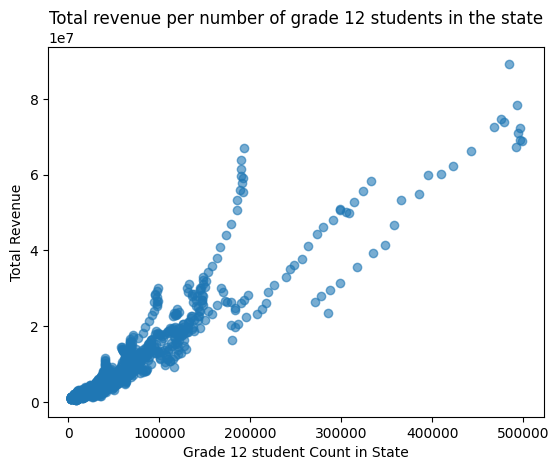

In [425]:
plt.scatter(data["GRADES_12_G"], data["TOTAL_REVENUE"], alpha=0.6)
plt.title("Total revenue per number of grade 12 students in the state")
plt.xlabel("Grade 12 student Count in State")
plt.ylabel("Total Revenue")
plt.show()


Revenue per number of grade 12 students in state. Correlation seen

**Visualization 2.5**

Showing variations between different states

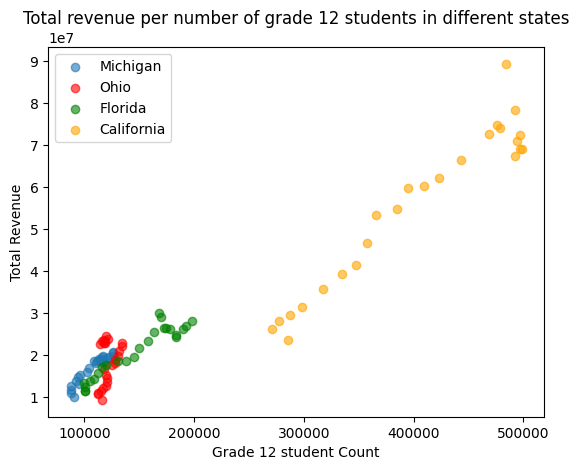

In [426]:
michigan_data = data[data["STATE"] == "MICHIGAN"]
ohio_data = data[data["STATE"] == "OHIO"]
florida_data = data[data["STATE"] == "FLORIDA"]
california_data = data[data["STATE"] == "CALIFORNIA"]
plt.scatter(michigan_data["GRADES_12_G"], michigan_data["TOTAL_REVENUE"], alpha=0.6, label='Michigan')
plt.scatter(ohio_data["GRADES_12_G"], ohio_data["TOTAL_REVENUE"], alpha=0.6, label='Ohio', color='red')
plt.scatter(florida_data["GRADES_12_G"], florida_data["TOTAL_REVENUE"], alpha=0.6, label='Florida', color='green')
plt.scatter(california_data["GRADES_12_G"], california_data["TOTAL_REVENUE"], alpha=0.6, label='California', color='orange')
plt.title("Total revenue per number of grade 12 students in different states")
plt.xlabel("Grade 12 student Count")
plt.ylabel("Total Revenue")
plt.legend()
plt.show()


<h2> Data Creation </h2>

_Use this space to create train/test data_

In [427]:
from sklearn.model_selection import train_test_split

In [428]:
y = data["TOTAL_REVENUE"].dropna()
X = data["GRADES_12_G"][y.index]
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

Normalize Data

In [429]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [430]:
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [432]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [433]:
# create your model here
model = LinearRegression()

In [434]:
model.fit(X_train, y_train)

LinearRegression()

In [435]:
y_pred = model.predict(X_test)

Visualization

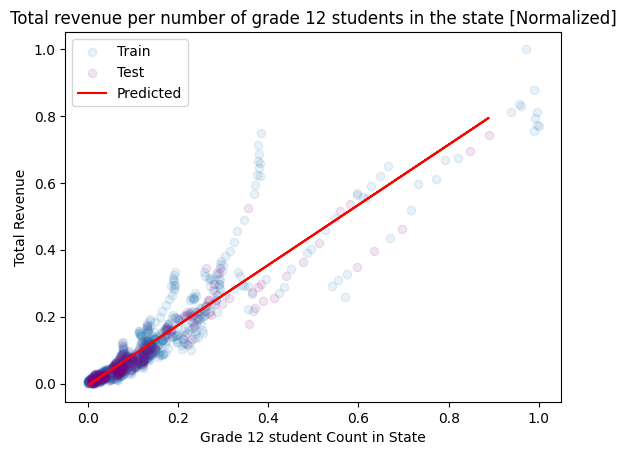

In [436]:
plt.scatter(X_train, y_train, alpha=0.1, label='Train')
plt.scatter(X_test, y_test, alpha=0.1, label='Test', color='purple')
plt.plot(X_test, y_pred, alpha=1, label='Predicted', color='red')
plt.title("Total revenue per number of grade 12 students in the state [Normalized]")
plt.xlabel("Grade 12 student Count in State")
plt.ylabel("Total Revenue")
plt.legend()
plt.show()
# I didnt realize the code near the bottom of the file did this for me

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [437]:
print("model score:", model.score(X_test, y_test))
print("mean absolute error:", np.mean(np.abs(model.predict(X_test)-y_test)))
print("root mean squared error:", np.mean((model.predict(X_test)-y_test)**2)**0.5)

model score: 0.9031759969783751
mean absolute error: 0.0208327361608788
root mean squared error: 0.03551838520814313


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

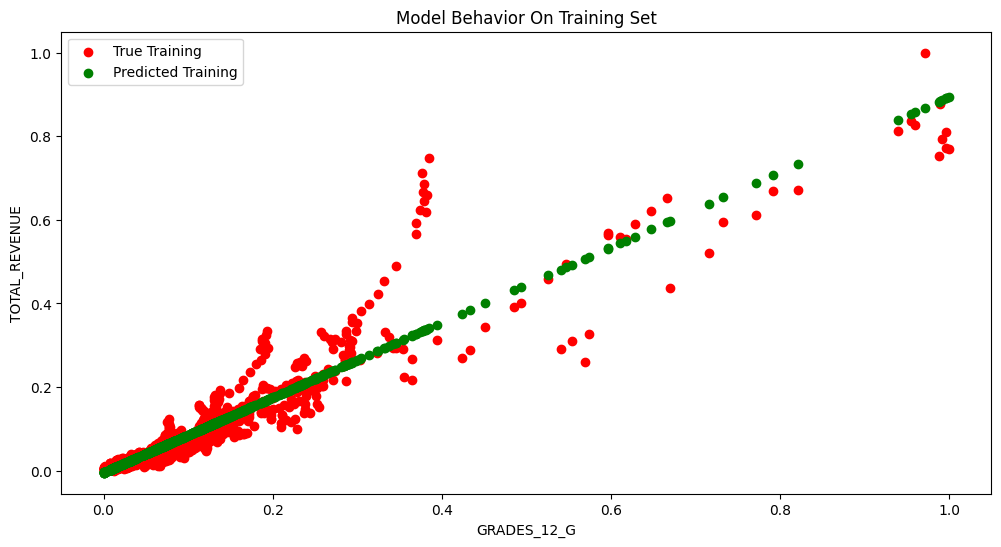

In [438]:
col_name = 'GRADES_12_G'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_train, model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('TOTAL_REVENUE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

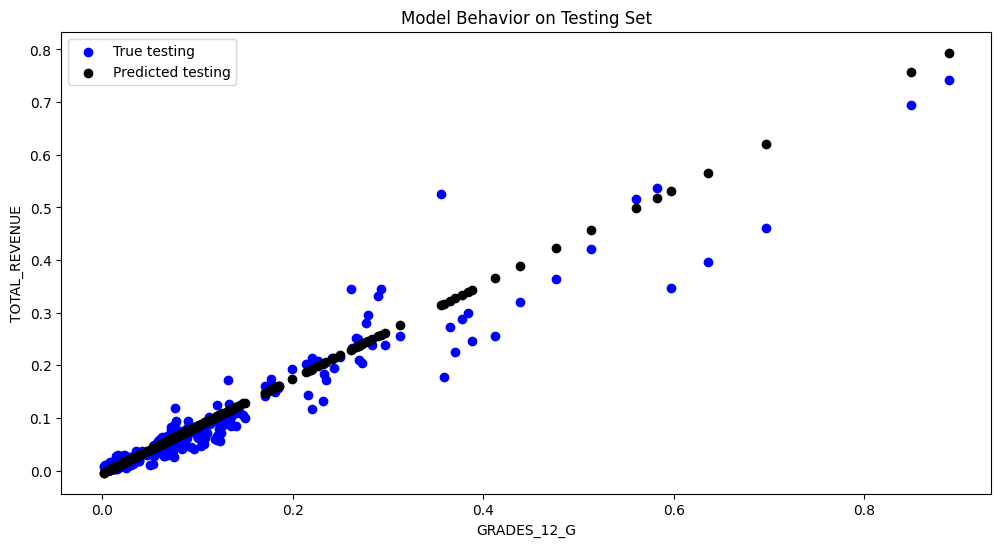

In [439]:
col_name = "GRADES_12_G"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test, y_test, color = "blue")
plt.scatter(X_test, model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('TOTAL_REVENUE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

The data seems to have outliers specifically relating to more populous states (see model specifically relating to states) but despite this, the model still worked with most the points, tho gaving an upward skew in the cluster of the points. I see that there is in fact a correlation with revenue to amount of students as expected. To enhance the performance of my model, I normalized the values (X and y were normalized independent of each other) and this also helped with error analysis. I had trouble with shaping the model, so I directly reshaped it, this led to me also altering the bottom two graphs to not be indexed but to rather just use the arrays instead. Overall, it is a very interesting data set, and it took me a couple of tries to find data that actually has some sort of correlation with each other.